# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Phase 1 - Exploratory Data Analysis

## Loading Dataset

In [3]:
df = pd.read_csv("Dataset\zomato.csv")

### Showcasing the first 5 rows

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Printing info about the dataset
Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

Nearly 40k entry with no proper menu

In [7]:
df["menu_item"].value_counts()

menu_item
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [8]:
df["name"].value_counts()

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64

We have 17 features and we won't use all these features, i will discard features that won't be of use or has more than 50% of data as null values 

In [9]:
df.drop(columns = "url", inplace = True)
df.drop(columns = "address", inplace = True)
df.drop(columns = "name", inplace = True)
df.drop(columns = "phone", inplace = True)
df.drop(columns = "menu_item", inplace = True)
df.drop(columns = "reviews_list", inplace = True)
df.drop(columns = "dish_liked", inplace = True)
df.drop(columns = "listed_in(city)", inplace = True)
df.drop(columns = "listed_in(type)", inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


### data cleaning

In [11]:
def clean_rate(dataset):
    #clean the rate data and transform it into a float number fit for analysis and usage in general
    for i in range(dataset['rate'].size):
        dataset['rate'][i] = re.sub(r'[\-]', '', dataset['rate'][i]) #remove strange symbols that exists
        dataset['rate'][i] = re.sub(r'[a-zA-Z]', '', dataset['rate'][i]) # remove Characters
        dataset['rate'][i] = re.sub(r'/5', '', dataset['rate'][i]) # remove /5 to have the rate only knowing already that it's base 5
        if dataset['rate'][i] != '':
            dataset['rate'][i] = float(dataset['rate'][i]) 
        else:
            dataset['rate'][i] =  None

    df['rate'] = pd.to_numeric(df['rate'], errors='coerce', downcast='float')

    #remove any data 

In [12]:
def clean_approx_cost(dataset):
    for i in range(dataset['approx_cost(for two people)'].size):
        if type(dataset['approx_cost(for two people)'][i]) == str :
            dataset['approx_cost(for two people)'][i] = re.sub(r',', '', dataset['approx_cost(for two people)'][i])
            dataset['approx_cost(for two people)'][i] = int(dataset['approx_cost(for two people)'][i])

In [13]:
df = df.dropna().reset_index(drop=True)
clean_rate(df)
clean_approx_cost(df)

In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600
...,...,...,...,...,...,...,...,...
41258,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800
41259,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800
41260,No,No,3.6,27,Whitefield,Bar,Continental,1500
41261,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500


#### rate

In [16]:
df['rate'].value_counts()

rate
3.9    3958
3.8    3819
3.7    3808
3.6    3287
4.0    3145
4.1    2928
3.5    2764
3.4    2447
3.3    2277
4.2    2155
3.2    1845
4.3    1683
3.1    1550
4.4    1146
3.0     991
2.9     801
4.5     656
2.8     580
2.7     303
4.6     300
2.6     249
4.7     167
2.5     100
2.4      66
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64

## Univariate analysis

#### rate

(array([   40.,   143.,   652.,  2372.,  5672.,  8498., 11585.,  8228.,
         3485.,   588.]),
 array([1.79999995, 2.1099999 , 2.42000008, 2.73000002, 3.03999996,
        3.3499999 , 3.66000009, 3.97000003, 4.28000021, 4.59000015,
        4.9000001 ]),
 <BarContainer object of 10 artists>)

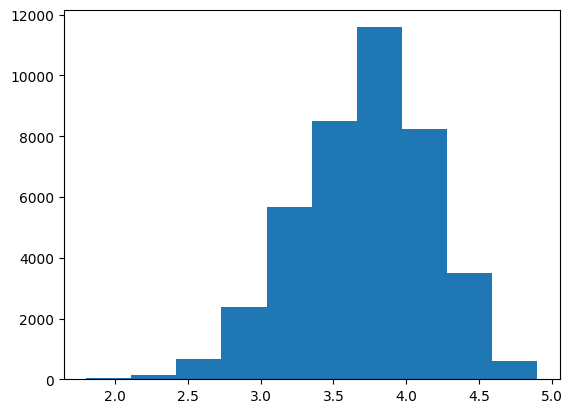

In [17]:
plt.hist(df['rate'])

#### votes

(array([3.9147e+04, 1.4350e+03, 4.5300e+02, 6.2000e+01, 1.0000e+02,
        2.8000e+01, 1.3000e+01, 2.0000e+00, 1.7000e+01, 6.0000e+00]),
 array([    0. ,  1683.2,  3366.4,  5049.6,  6732.8,  8416. , 10099.2,
        11782.4, 13465.6, 15148.8, 16832. ]),
 <BarContainer object of 10 artists>)

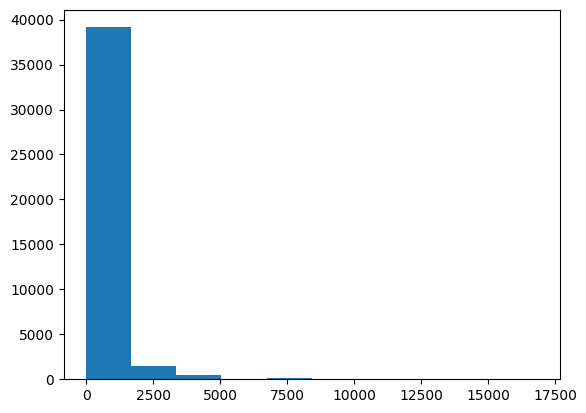

In [18]:
plt.hist(df['votes'])

#### approx_cost(for two people)

(array([2.8355e+04, 9.2380e+03, 2.6270e+03, 5.9800e+02, 3.6600e+02,
        4.0000e+01, 3.4000e+01, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  40.,  636., 1232., 1828., 2424., 3020., 3616., 4212., 4808.,
        5404., 6000.]),
 <BarContainer object of 10 artists>)

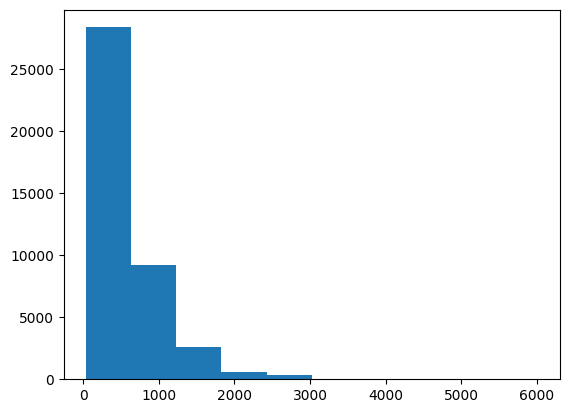

In [19]:
plt.hist(df['approx_cost(for two people)'])

#### order online

(array([27102., 14161.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

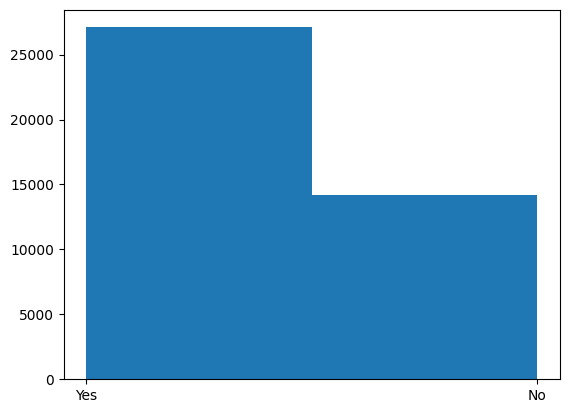

In [20]:
plt.hist(df['online_order'], bins=2)

#### book_table

(array([ 6304., 34959.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

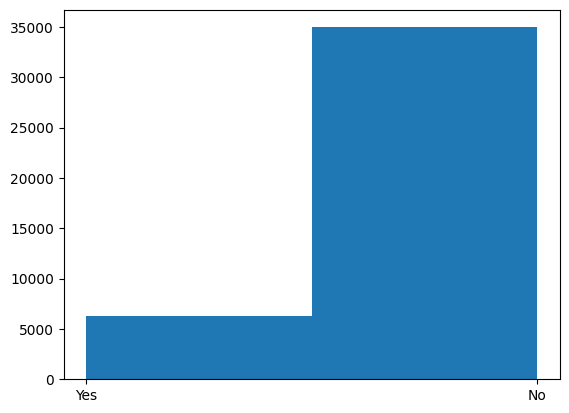

In [21]:
plt.hist(df['book_table'], bins=2)

Create target variable to be used in further analysis

In [22]:
def create_target(row):
    if row['rate'] >= 3.75:
        return 1
    else:
        return 0

# Apply the function to create the 'Target' column
df['Target'] = df.apply(create_target, axis=1)

### Business Questions

1. What are the most popular cuisines in Bengaluru?

2. Does the availability of online ordering affect a restaurant's success?

3. Are certain types of restaurants (e.g., pubs, fine dining) more successful than others in terms of ratings and popularity?

4. Is there a relationship between the average cost for two people and a restaurant's rating?

5. Do restaurant locations impact their success and ratings?

6. Is there a correlation between the restaurant's rating and the number of votes it receives?

7. Does the presence of a booking option (book_table) contribute to a restaurant's success?

To answer these questions we will approach each one and try to answer it with proper analysis

### Bivariate/Multivariate analysis

#### Cuisine Type

<Figure size 1200x600 with 0 Axes>

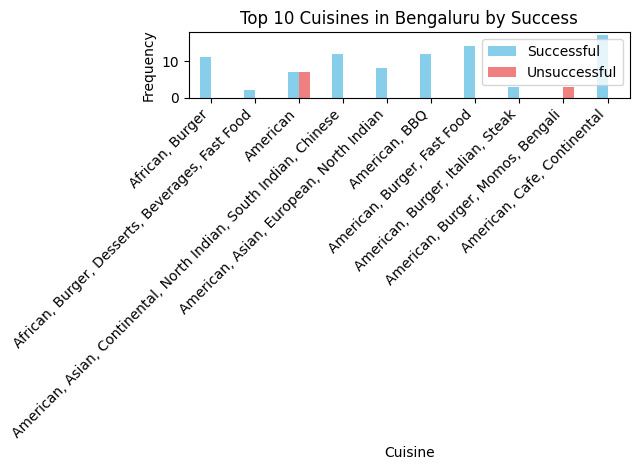

In [23]:
# Filter the data for successful restaurants (Target == 1)
successful_restaurants = df[df['Target'] == 1]

# Filter the data for unsuccessful restaurants (Target == 0)
unsuccessful_restaurants = df[df['Target'] == 0]

# Calculate the frequency of cuisines for successful restaurants
successful_cuisine_counts = successful_restaurants['cuisines'].value_counts()

# Calculate the frequency of cuisines for unsuccessful restaurants
unsuccessful_cuisine_counts = unsuccessful_restaurants['cuisines'].value_counts()

# Combine the counts into a single DataFrame
cuisine_comparison = pd.DataFrame({
    'Successful': successful_cuisine_counts,
    'Unsuccessful': unsuccessful_cuisine_counts
})

# Choose the top N cuisines to display (adjust N as needed)
top_n = 10
top_cuisines = cuisine_comparison.head(top_n)

# Create a bar chart to visualize the top cuisines for both successful and unsuccessful restaurants
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Top {} Cuisines in Bengaluru by Success'.format(top_n))
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Online Orders

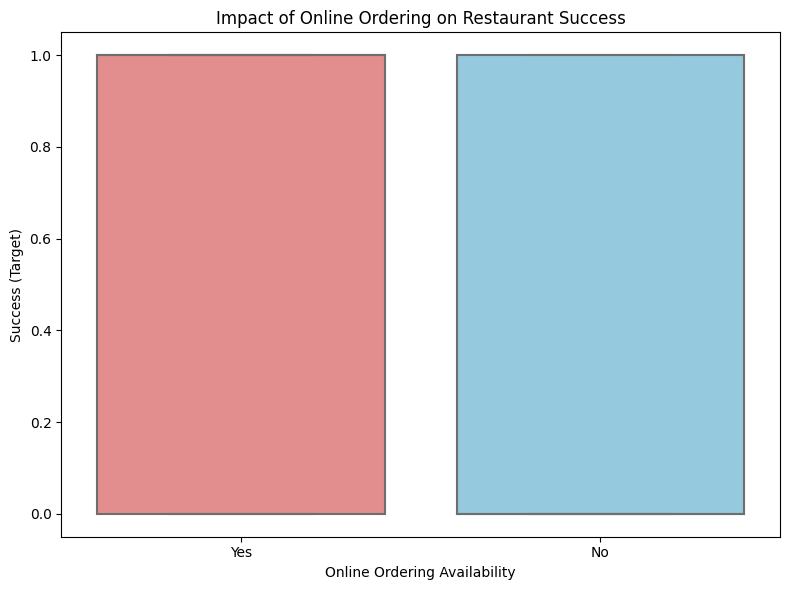

In [24]:
# Create a box plot to visualize the distribution of restaurant success by online ordering availability
plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='Target', data=df, palette=['lightcoral', 'skyblue'])
plt.title('Impact of Online Ordering on Restaurant Success')
plt.xlabel('Online Ordering Availability')
plt.ylabel('Success (Target)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Restaurant Type

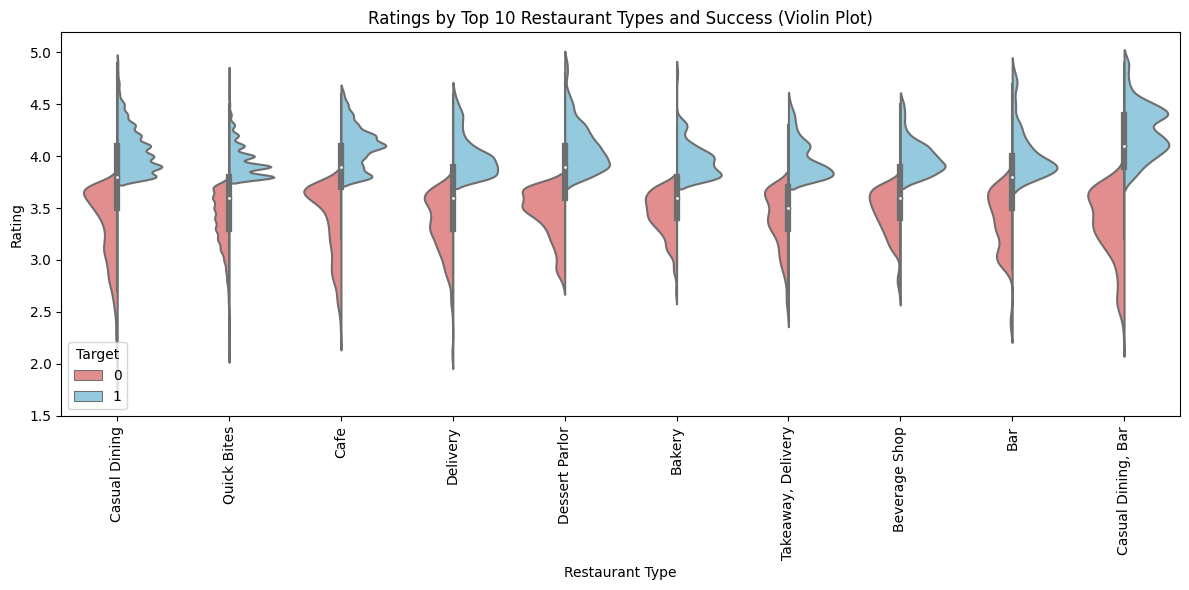

In [25]:
top_dining_types = df['rest_type'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 dining types
df_filtered = df[df['rest_type'].isin(top_dining_types)]

# Create a violin plot to compare ratings by restaurant type
plt.figure(figsize=(12, 6))
sns.violinplot(x='rest_type', y='rate', data=df_filtered, hue='Target', palette=['lightcoral', 'skyblue'], split=True)
plt.title('Ratings by Top 10 Restaurant Types and Success (Violin Plot)')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Average Cost

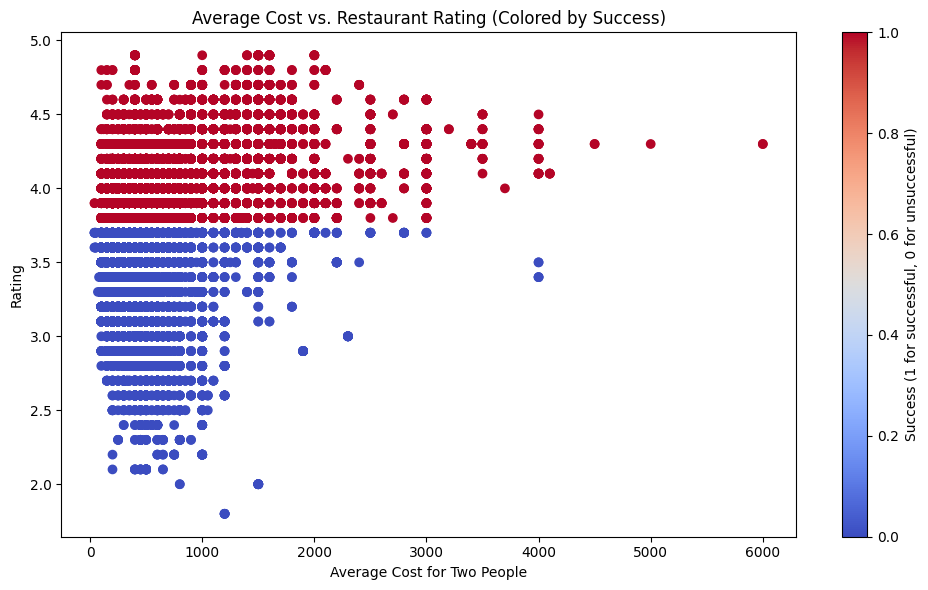

In [26]:
# Create a scatter plot to visualize the relationship between average cost and ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], c=df['Target'], cmap='coolwarm')
plt.title('Average Cost vs. Restaurant Rating (Colored by Success)')
plt.xlabel('Average Cost for Two People')
plt.ylabel('Rating')
plt.colorbar(label='Success (1 for successful, 0 for unsuccessful)')
plt.tight_layout()
plt.show()


Location

<Figure size 1200x600 with 0 Axes>

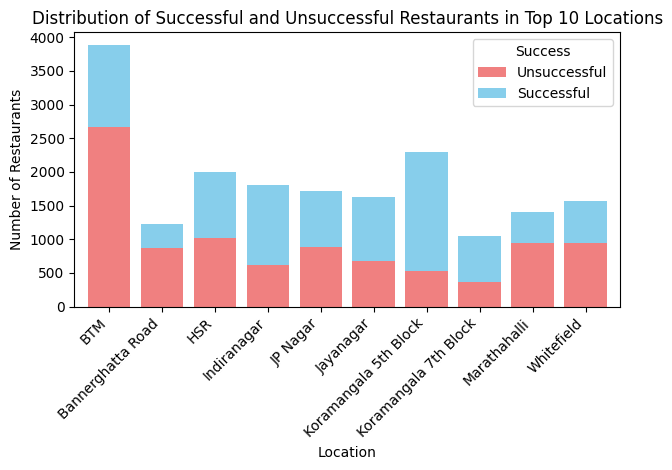

In [27]:
# Calculate the top 10 most frequent locations
top_locations = df['location'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 locations
df_top_locations = df[df['location'].isin(top_locations)]

# Calculate the distribution of restaurants by location and success(Traget)
location_success_counts = df_top_locations.groupby(['location', 'Target']).size().unstack(fill_value=0)

# Create a stacked bar chart to show the distribution of successful and unsuccessful restaurants in the top 10 locations
plt.figure(figsize=(12, 6))
location_success_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], width=0.8)
plt.title('Distribution of Successful and Unsuccessful Restaurants in Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Success', labels=['Unsuccessful', 'Successful'])
plt.tight_layout()
plt.show()

votes

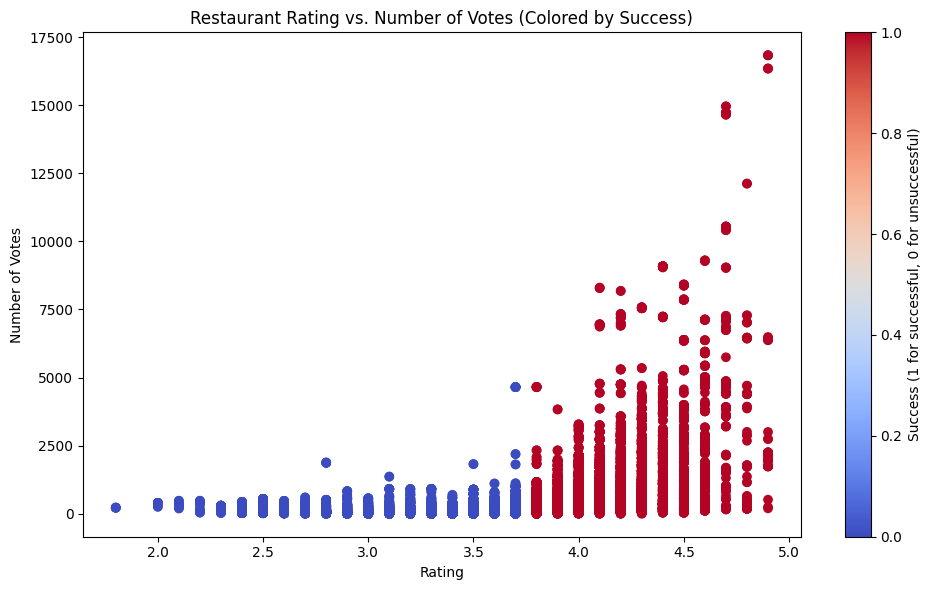

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rate'], df['votes'], c=df['Target'], cmap='coolwarm')
plt.title('Restaurant Rating vs. Number of Votes (Colored by Success)')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.colorbar(label='Success (1 for successful, 0 for unsuccessful)')
plt.tight_layout()
plt.show()

booking option

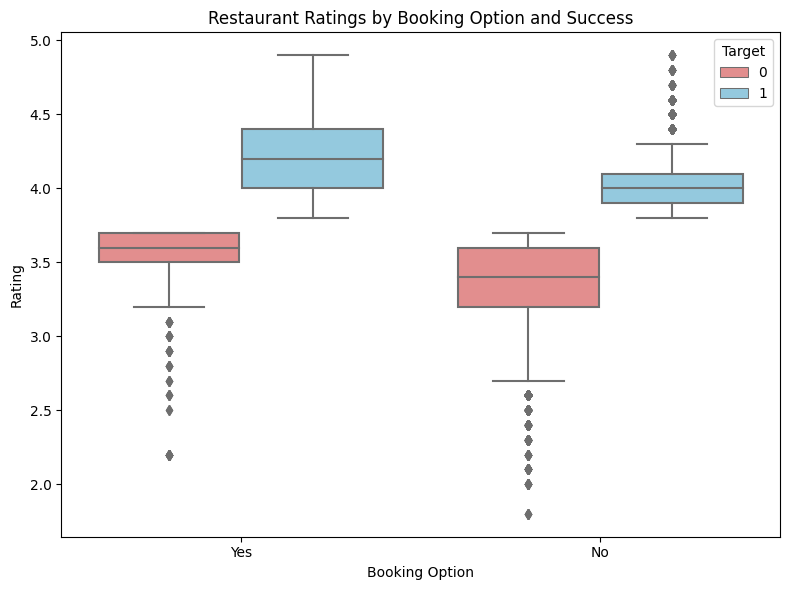

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='book_table', y='rate', data=df, hue='Target', palette=['lightcoral', 'skyblue'])
plt.title('Restaurant Ratings by Booking Option and Success')
plt.xlabel('Booking Option')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. Cuisine types do have an effect on the success of a restaurant.

2. Restaurants that offer online ordering tend to have a similar distribution of success as restaurants that do not offer online ordering.

3. Ratings can vary significantly across different restaurant types.

4. There is a weak positive correlation between the average cost for two people and restaurant ratings. Higher-cost restaurants tend to have slightly higher ratings.

5. The top 10 locations in Bengaluru have a mix of both successful and unsuccessful restaurants. Location alone does not determine restaurant success or ratings.

6. There is a positive correlation between restaurant ratings and the number of votes they receive. Restaurants with higher ratings tend to have more votes.

7. Restaurants with a booking option (book_table) tend to have slightly higher ratings and may attract more success. However, this relationship is not very strong.

## Data Preparation and Feature Engineering

#### Features to introduce:

1. Location Popularity: calculate the popularity of each restaurant's location .

2. Cuisine Diversity: create a feature that measures the diversity of cuisines offered by a restaurant.

#### Data Preparation

1. Encoding: encode restaurant type using label encoding

2. Feature Scaling: scale the number of votes down and the average cost


In [30]:
# Calculate the popularity of each location
location_popularity = df['location'].value_counts() / len(df)
df['location_popularity'] = df['location'].map(location_popularity)

In [31]:
# Create a feature for cuisine diversity (count of unique cuisine types)
df['cuisine_diversity'] = df['cuisines'].str.split(', ').apply(len)

In [32]:
# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'rest_type' feature
df['rest_type_encoded'] = label_encoder.fit_transform(df['rest_type'])

df['book_table_encoded'] = label_encoder.fit_transform(df['book_table'])


In [33]:
scaler = MinMaxScaler()

# Scale the 'votes' feature
df['votes_scaled'] = scaler.fit_transform(df['votes'].values.reshape(-1, 1))

df['average_cost_scaled'] = scaler.fit_transform(df['approx_cost(for two people)'].values.reshape(-1, 1))

df['rest_type_scaled'] = scaler.fit_transform(df['rest_type_encoded'].values.reshape(-1, 1))

In [34]:
df = df.drop(columns=["online_order", "book_table", "rate", "votes", "location", "rest_type", "approx_cost(for two people)", "cuisines", "rest_type_encoded"])

In [35]:
df = df[["rest_type_scaled", "average_cost_scaled", "votes_scaled", "location_popularity", "cuisine_diversity", "book_table_encoded", "Target"]]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rest_type_scaled     41263 non-null  float64
 1   average_cost_scaled  41263 non-null  float64
 2   votes_scaled         41263 non-null  float64
 3   location_popularity  41263 non-null  float64
 4   cuisine_diversity    41263 non-null  int64  
 5   book_table_encoded   41263 non-null  int32  
 6   Target               41263 non-null  int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 2.0 MB


## Feature selection and Modeling

In [37]:
X = df.drop('Target', axis=1)

y = df['Target']

### Feature Selection
using filter method mutual info

In [38]:
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = k_best_mi.fit_transform(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

### Training
Logistic Regression - Neural Networks - Support Vector Machine

#### Logistic Regression

In [40]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("\nLogistic Regression Report:")
print(classification_report_result)

Accuracy: 0.7463952502120441

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      4286
           1       0.82      0.60      0.70      3967

    accuracy                           0.75      8253
   macro avg       0.76      0.74      0.74      8253
weighted avg       0.76      0.75      0.74      8253



#### Support Vector Machine

In [41]:
# Create an SVM classifier (Support Vector Machine)
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("\nSVM Report:")
print(classification_report_result)

Accuracy: 0.7430025445292621

SVM Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      4286
           1       0.88      0.54      0.67      3967

    accuracy                           0.74      8253
   macro avg       0.78      0.74      0.73      8253
weighted avg       0.78      0.74      0.73      8253



#### Neural Network

In [42]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Create a sequential neural network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(units=8, activation='relu'))  # Hidden layer 1

# Add output layer
model.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Predict the target values for the test set
y_pred_encoded = model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("\nNeural Network Evaluation:")
print(classification_report_result)

Epoch 1/10
826/826 [==============================] - 2s 1ms/step - loss: 0.5259 - accuracy: 0.7316 - val_loss: 0.5469 - val_accuracy: 0.7342
Epoch 2/10
826/826 [==============================] - 1s 1ms/step - loss: 0.4707 - accuracy: 0.7792 - val_loss: 0.4394 - val_accuracy: 0.7935
Epoch 3/10
826/826 [==============================] - 1s 1ms/step - loss: 0.4517 - accuracy: 0.7876 - val_loss: 0.4651 - val_accuracy: 0.7931
Epoch 4/10
826/826 [==============================] - 1s 1ms/step - loss: 0.4426 - accuracy: 0.7881 - val_loss: 0.4329 - val_accuracy: 0.7955
Epoch 5/10
826/826 [==============================] - 1s 1ms/step - loss: 0.4382 - accuracy: 0.7892 - val_loss: 0.4834 - val_accuracy: 0.7913
Epoch 6/10
826/826 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.7922 - val_loss: 0.4983 - val_accuracy: 0.7979
Epoch 7/10
826/826 [==============================] - 1s 1ms/step - loss: 0.4301 - accuracy: 0.7918 - val_loss: 0.4475 - val_accuracy: 0.7960
Epoch 

### Parameter Tuning 
parameter tuning is a crucial step in building machine learning models that perform well on real-world tasks. It helps in finding the optimal settings for the model, improve its performance, avoid underfitting and overfitting and ensure that it generalizes effectively to unseen data.

#### Tuning Applied
- Adam and RMSprop as Optimizers with a learning rate of 0.01 instead of the default 0.001 and RMSprop gave better results
- Sigmoid, Relu and Tanh as Activation functions with Relu Yielding the best results


### Validating
By evaluating a model on a validation set, we can make informed decisions about model selection, hyperparameter tuning, and prevent overfitting, ultimately leading to more reliable and effective machine learning models.